In [1]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

import torch 
import numpy as np

In [2]:
base_fig_size = 1.75

In [3]:
torch.manual_seed(0)

In [4]:
name = "super_final_benchmark"
df = query(name)
ids = query_main(name)
idxs_final = []
id1 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.001, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=100., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'
b'Skipping line 1842: expected 18 fields, saw 35\n'


In [5]:
idxs_final

['3eae3290-4af3-438e-be9c-aaf5ee2c0c02',
 '9383e00f-3667-4eed-a7c2-5b9ee8d1f95f',
 'f5c8e572-c81e-40cb-92f5-39bdb0da64e4',
 '3e361680-f1e9-4908-9c57-1e60045086b2',
 'ff3d1d22-3282-4ca8-9690-548617631bb9',
 'ec9d37d2-e1e9-45ef-8589-f67b044a4f7d']

In [6]:
np.random.seed(0)

In [7]:
colors = ["#08519c", "#d94801"]

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: f5c8e572-c81e-40cb-92f5-39bdb0da64e4, Task: lotka_volterra, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =c7a3a5d1-bc66-4ac7-9b18-67ec2247ca53, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


b'Skipping line 1842: expected 18 fields, saw 35\n'
/tmp/ipykernel_31393/70766706.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)


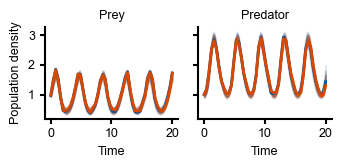

In [8]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="lotka_volterra", 
                                                      model_name="maf", eps=2., id=idxs_final[2], idx_adv_example=0, N_train=100000, 
                                                      metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                                      plotting_kwargs={"colors": colors, "markersize": 2., "lw":2., "figsize":(base_fig_size*2,base_fig_size)})
    fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: f5c8e572-c81e-40cb-92f5-39bdb0da64e4, Task: lotka_volterra, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =c7a3a5d1-bc66-4ac7-9b18-67ec2247ca53, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/mnt/qb/work/ / /miniconda3/envs/rbi/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/tmp/ipykernel_31393/2463446917.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)


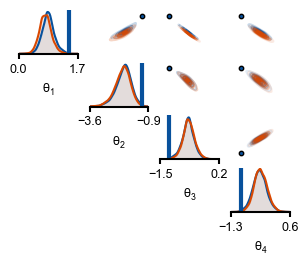

In [9]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="lotka_volterra", model_name="maf",id=idxs_final[2], eps=2., idx_adv_example=0, 
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"colors":colors, "bins": 100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 1.5*base_fig_size)})
    fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: 9383e00f-3667-4eed-a7c2-5b9ee8d1f95f, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =4b9cfb9d-7ac3-4bc4-87fb-876ad75a73ed, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


b'Skipping line 1842: expected 18 fields, saw 35\n'
/tmp/ipykernel_31393/4141039853.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)


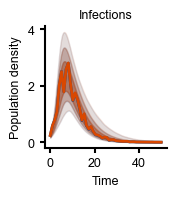

In [10]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="sir", model_name="maf", eps=0.2,id=idxs_final[1], idx_adv_example=0, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", plotting_kwargs={"colors": colors, "all_states":False, "figsize": (0.9*base_fig_size,0.9*base_fig_size)})
    fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: 9383e00f-3667-4eed-a7c2-5b9ee8d1f95f, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =4b9cfb9d-7ac3-4bc4-87fb-876ad75a73ed, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_31393/2289557680.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)


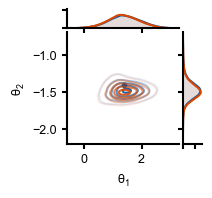

In [11]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", eps=0.2,id=idxs_final[1], idx_adv_example=0, N_train=100000, 
    metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", n_samples=50000, type="2djointplot", 
    plotting_kwargs={"bins":200, "figsize":(base_fig_size,base_fig_size), "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"]})
    fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: ff3d1d22-3282-4ca8-9690-548617631bb9, Task: vae_task, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =53b60dda-f1f9-4cc1-9f7d-75824c171a2d, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


b'Skipping line 1842: expected 18 fields, saw 35\n'
/tmp/ipykernel_31393/3278060827.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)


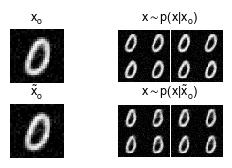

In [12]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="vae_task", model_name="maf",id=idxs_final[4], eps=2., 
    idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"n_samples":8, "nrow":4,"titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]], "figsize":(2*base_fig_size, base_fig_size), "grid_spec_width_ratios": (1,1), "grid_padding": 1})
    plt.subplots_adjust(wspace=-.3, hspace=.4)
    fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: ff3d1d22-3282-4ca8-9690-548617631bb9, Task: vae_task, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =53b60dda-f1f9-4cc1-9f7d-75824c171a2d, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_31393/2771678383.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)


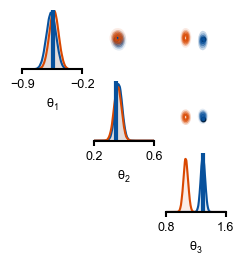

In [13]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="vae_task", model_name="maf", eps=2., id=idxs_final[4],
                                           idx_adv_example=2, N_train=100000, n_samples=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           plotting_kwargs={"colors":colors, "bins": 100, "figsize": (1.5*base_fig_size, 1.5*base_fig_size),"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$"]})
    fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: ec9d37d2-e1e9-45ef-8589-f67b044a4f7d, Task: spatial_sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =ca88cd03-5e24-45fc-96f1-14271d445f5a, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


b'Skipping line 1842: expected 18 fields, saw 35\n'
/tmp/ipykernel_31393/2621970058.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)


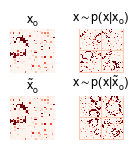

In [14]:
with use_style("pyloric"):
    torch.manual_seed(3)
    fig, axes = plot_adversarial_posterior_predictive(name, task="spatial_sir", model_name="maf", eps=2., id=idxs_final[5],
                                                      idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", 
                                                      attack="L2PGDAttack",
                                                      plotting_kwargs={"n_samples":4, "grid_pad_value":0.2, "grid_padding":2, "pad_label":0, "grid_spec_width_ratios": (1,1), "nrow":2, "figsize":(1.2*base_fig_size,0.9*base_fig_size), "titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]]})
    plt.subplots_adjust(hspace=0.5, wspace=-0.4)
    fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: ec9d37d2-e1e9-45ef-8589-f67b044a4f7d, Task: spatial_sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =ca88cd03-5e24-45fc-96f1-14271d445f5a, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_31393/1738566958.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)


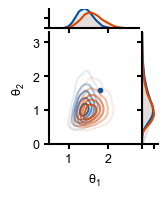

In [15]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="spatial_sir", model_name="maf", eps=2., idx_adv_example=2, id=idxs_final[5],
                                           N_train=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           n_samples=10000, type="2djointplot", 
                                           plotting_kwargs={"bins":200, "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"], "figsize":(base_fig_size*0.8, base_fig_size)})
    fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

In [16]:
torch.manual_seed(1)

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: 3e361680-f1e9-4908-9c57-1e60045086b2, Task: hudgkin_huxley, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =8b493c95-d32f-47d5-826b-5ffe07537640, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


b'Skipping line 1842: expected 18 fields, saw 35\n'
/tmp/ipykernel_31393/2677730623.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)


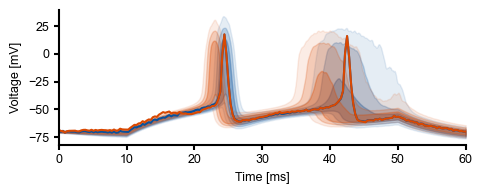

In [17]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="hudgkin_huxley", 
                                                      model_name="maf", eps=1., idx_adv_example=15, N_train=100000, id=idxs_final[3],
                                                      metric_rob="ReverseKLRobMetric", attack="L2PGDAttack",
                                                      n_samples=200000, 
                                                      plotting_kwargs={"colors":colors,"samples_to_plot":0, "lw":1.5, "figsize":(3*base_fig_size, base_fig_size)})
    fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)
    plt.show()

b'Skipping line 1842: expected 18 fields, saw 35\n'


Following data row is used:
Id: 3e361680-f1e9-4908-9c57-1e60045086b2, Task: hudgkin_huxley, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =8b493c95-d32f-47d5-826b-5ffe07537640, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_31393/661598213.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)


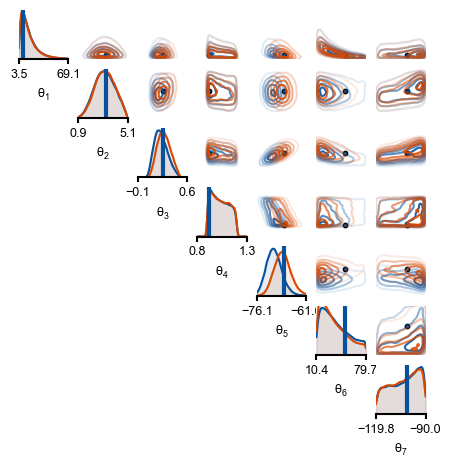

In [18]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="hudgkin_huxley", model_name="maf", eps=1., idx_adv_example=15,id=idxs_final[3],
    N_train=100000, n_samples=50000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"colors":colors, "figsize":(3*base_fig_size,3*base_fig_size), "bins":100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$",r"$\theta_5$",r"$\theta_6$",r"$\theta_7$"]})
    fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)
    plt.show()